In [ ]:
#### 0.0.1 - 2021 - 01 - 01
#### Dr. Marco Aceves 
#### rev en Jupyter Notebook
#### Código como ejemplo como parte del libro:
#### Inteligencia Artificial para Programadores con Prisa
#### 8.7_Outliers.ipynb
# Detección de valores atípicos

In [5]:
#Importamos las Librerías
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('Gorriones.csv')
df.head()

X1   X2    X3    X4    X5     Supervivencia
0  156  245  31.6  18.5  20.5     Superviviente
1  154  240  30.4  17.9  19.6  No superviviente
2  153  240  31.0  18.4  20.6  No superviviente
3  153  236  30.9  17.7  20.2  No superviviente
4  155  243  31.5  18.6  20.3     Superviviente

In [6]:
def graficar(A, limite_inf, limite_sup):
# creamos el indice
    index = np.arange(0, A.shape[0])
    # creamos una lista vacía para agreagar los errores de cardinalidad y/o los outliers
    errores = []
    # graficamos los datos en una gráfica de dispersión
    plt.subplot(1, 2, 1)
    plt.scatter(index, A)
    plt.title('Scatter')

    for ind in index:
        plt.annotate(ind, (ind, A[ind]))

        if A[ind] < limite_inf or A[ind] > limite_sup:
            # graficamos los outliers de color rojo
            plt.plot(ind, A[ind], color='red', marker='o')
            # agregamos los outliers y/o errores de cardinalidad a la lista de errores
            errores.append(str(ind)+':'+str(A[ind]))

    # imprimimos los outliers
    print(errores)
    plt.subplot(1, 2, 2)
    plt.boxplot(A)
    plt.title('Boxplot')

In [7]:
def det_outliers_quantiles(A):
    # try/except para evitar tipos de datos no numéricos
    try:
        # definimos el primer quantile (25%)
        Q1 = A.quantile(0.25)
        # definimos el tercer quantile (75%)
        Q3 = A.quantile(0.75) 
        # calculamos el IQR
        IQR = Q3 - Q1
        # calculamos los limites
        limite_inf = Q1 - (1.5*IQR)
        limite_sup = Q3 + (1.5*IQR)
	# Llamada a la función graficar
        graficar(A, limite_inf, limite_sup)
    except Exception as e:
        print('Tipo de dato no válido.\nTiene que ser numérico')
        print(e.__class__.__name__, e)

[]


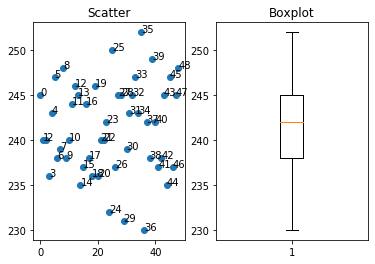

In [8]:
ejeY = df['X2']
det_outliers_quantiles(ejeY)